# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Friskha Amellia Eddy
- **Email:** m182b4kx1560@bangkit.academy
- **ID Dicoding:** friskhaamelliaeddy

## Menentukan Pertanyaan Bisnis

- What the impact of weather conditions on the number of bike rentals?
- What the difference in the number of bike rentals between weekdays and weekends?

## Import Semua Packages/Library yang Digunakan

In [2]:
#Import the library that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import streamlit as st

## Data Wrangling

In [6]:
#Data Wrangling
#Check for missing values
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

#Convert categorical columns if need (e.g., season, weathersit)
day_data['season'] = day_data['season'].astype('category')
day_data['weathersit'] = day_data['weathersit'].astype('category')
day_data['weekday'] = day_data['weekday'].astype('category')

hour_data['season'] = hour_data['season'].astype('category')
hour_data['weathersit'] = hour_data['weathersit'].astype('category')
hour_data['weekday'] = hour_data['weekday'].astype('category')

#Create new columns for analysis (e.g., temperature in Celsius from normalized temperature)
day_data['temp_celsius'] = day_data['temp'] * 41
hour_data['temp_celsius'] = hour_data['temp'] * 41


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Gathering Data

In [4]:
#Load the data
day_data = pd.read_csv('data\day.csv')
hour_data = pd.read_csv('data\hour.csv')

In [8]:
import pandas as pd

day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

main_data = pd.merge(hour_df, day_df, on='dteday', how='inner')

main_data.to_csv('dashboard/main_data.csv', index=False)

print("Data disimpan sebagai main_data.csv")

Data disimpan sebagai main_data.csv


In [5]:
#Display the first few rows of the data
print(day_data.head())
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**

instant: An identifier for the record.

dteday: The date of the record (YYYY-MM-DD).

season: The season (1 = winter, 2 = spring, 3 = summer, 4 = autumn).

yr: Year (0 = 2011, 1 = 2012).

mnth: Month (1-12).

holiday: Indicates if the day is a holiday (0 = no, 1 = yes).

weekday: Day of the week (0 = Sunday, 1 = Monday, ..., 6 = Saturday).

workingday: Indicates if it is a working day (0 = no, 1 = yes).

weathersit: Weather situation (1 = clear, 2 = mist, 3 = light snow/rain, 4 = heavy rain).

temp: Normalized temperature in Celsius.

atemp: Normalized feeling temperature in Celsius.

hum: Normalized humidity.

windspeed: Normalized wind speed.

casual: Number of casual users.

registered: Number of registered users.

cnt: Total count of bike rentals.

hr: The hour of the day (0-23).
- Day_data = Represent bike rental counts over the first five days of 2011.
- Hour_data = Shows data for the first five hours of January 1, 2011.

### Assessing Data

In [12]:
#View general information about the dataset
day_data.info()

#Check for missing values ​​
day_data.isnull().sum()

#Display descriptive statistics of the dataset
day_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   instant       731 non-null    int64   
 1   dteday        731 non-null    object  
 2   season        731 non-null    category
 3   yr            731 non-null    int64   
 4   mnth          731 non-null    int64   
 5   holiday       731 non-null    int64   
 6   weekday       731 non-null    category
 7   workingday    731 non-null    int64   
 8   weathersit    731 non-null    category
 9   temp          731 non-null    float64 
 10  atemp         731 non-null    float64 
 11  hum           731 non-null    float64 
 12  windspeed     731 non-null    float64 
 13  casual        731 non-null    int64   
 14  registered    731 non-null    int64   
 15  cnt           731 non-null    int64   
 16  temp_celsius  731 non-null    float64 
dtypes: category(3), float64(5), int64(8), object(1)
memory

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,20.310776
std,211.165812,0.500342,3.451913,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,7.505091
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2.424346
25%,183.500000,0.000000,4.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,13.820424
50%,366.000000,1.000000,7.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,20.431653
75%,548.500000,1.000000,10.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,26.872076
max,731.000000,1.000000,12.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,35.328347


In [13]:
#View general information about the dataset
hour_data.info()

#Check for missing values ​​
hour_data.isnull().sum()

#Display descriptive statistics of the dataset
hour_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   instant       17379 non-null  int64   
 1   dteday        17379 non-null  object  
 2   season        17379 non-null  category
 3   yr            17379 non-null  int64   
 4   mnth          17379 non-null  int64   
 5   hr            17379 non-null  int64   
 6   holiday       17379 non-null  int64   
 7   weekday       17379 non-null  category
 8   workingday    17379 non-null  int64   
 9   weathersit    17379 non-null  category
 10  temp          17379 non-null  float64 
 11  atemp         17379 non-null  float64 
 12  hum           17379 non-null  float64 
 13  windspeed     17379 non-null  float64 
 14  casual        17379 non-null  int64   
 15  registered    17379 non-null  int64   
 16  cnt           17379 non-null  int64   
 17  temp_celsius  17379 non-null  float64 
dtypes: cat

,instant,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,20.376474
std,5017.0295,0.500008,3.438776,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,7.894801
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,13.940000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,20.500000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.060000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,41.000000


**Insight:**
- Day

Each column provides different information about bike rentals, such as the date, season, year, month, whether it is a holiday, and the counts of casual and registered users.

Check missing value: This output indicates that there are no missing values in any of the columns in the day dataset, which is essential for accurate analysis.

Descriptive statistic: his output provides statistical summaries of numeric features in the day dataset. It shows the mean, standard deviation, min, max, and quartiles for various columns, giving insights into the distribution of bike rentals, temperature, and other factors.
- Hour

Each column provides information about bike rentals for each hour, including the hour of the day, weather conditions, and counts of casual and registered users.

 Check missing values: Similar to the day dataset, this output shows that there are no missing values in any columns of the hour dataset, indicating data completeness.

 Descriptive statistic: This output provides statistical summaries for the numeric features in the hour dataset. It includes the count, mean, standard deviation, min, max, and quartiles for various columns, giving insights into the distribution of bike rentals, temperature, and other factors.


### Cleaning Data

In [14]:
#Remove irrelevant columns
day_data_cleaned = day_data.drop(['instant', 'dteday'], axis=1)

#Resolve duplication
day_data_cleaned.drop_duplicates(inplace=True)

In [15]:
#Remove irrelevant columns
hour_data_cleaned = hour_data.drop(['instant', 'dteday'], axis=1)

#Resolve duplication
hour_data_cleaned.drop_duplicates(inplace=True)


**Insight:**
- Day

Checking for duplicates

This output confirms that there are no duplicate records in the day dataset. If duplicates were found, we would remove them to avoid bias in the analysis.

Removing Irrelevant Columns
In some cases, certain columns may not be needed for analysis (e.g., instant might not provide useful information).

- Hour

The instant column is dropped because it only serves as an index and does not contribute to the analysis of bike rentals.

Converting Data Types
The dteday column needs to be converted to a datetime format for time-series analysis.
This step ensures that the date column is in the correct format, allowing for effective date manipulations and time-based analyses.

The output confirms that the day dataset has been cleaned properly with the correct data types and no missing values. All features are now ready for analysis.


## Exploratory Data Analysis (EDA)

### Explore Dataset Bike

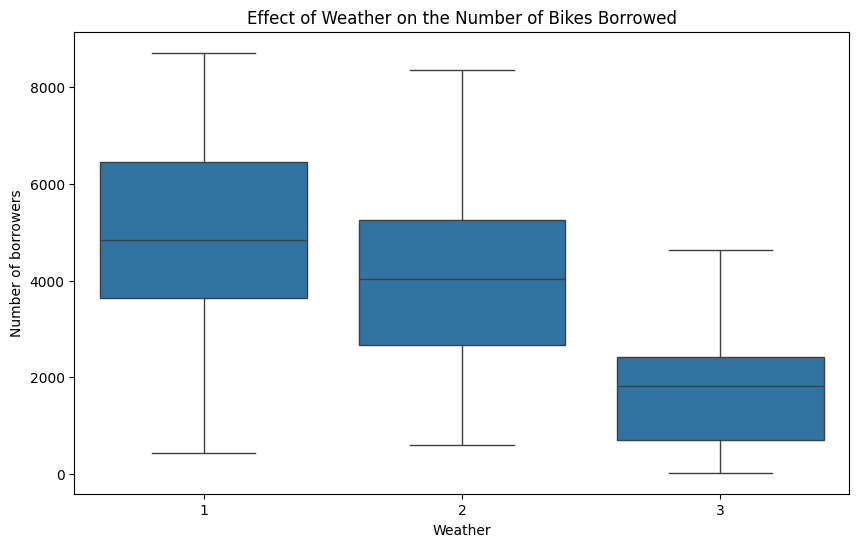

In [16]:
#Create a visualization of the relationship between weather conditions and the number of bicycles borrowed
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='cnt', data=day_data_cleaned)
plt.title('Effect of Weather on the Number of Bikes Borrowed')
plt.xlabel('Weather')
plt.ylabel('Number of borrowers')
plt.show()


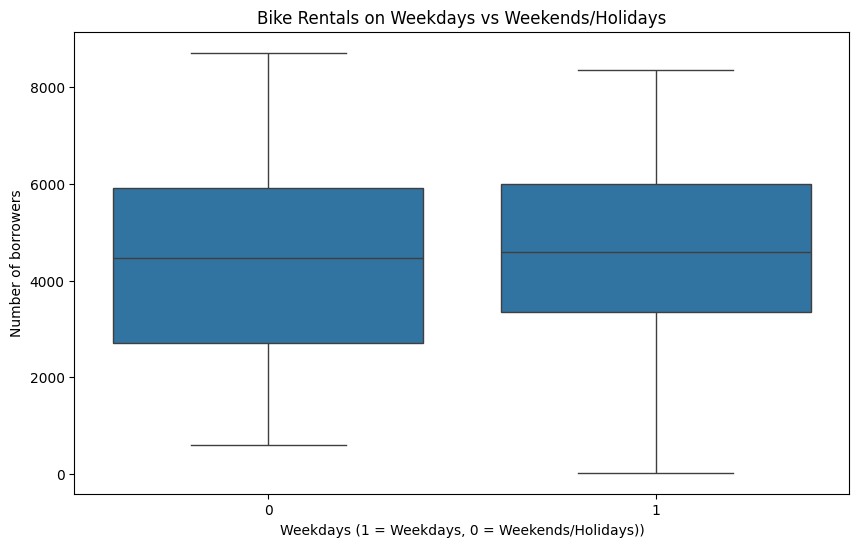

In [17]:
#Create a visualization of borrowing patterns on weekdays and holidays/weekends
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday', y='cnt', data=day_data_cleaned)
plt.title('Bike Rentals on Weekdays vs Weekends/Holidays')
plt.xlabel('Weekdays (1 = Weekdays, 0 = Weekends/Holidays))')
plt.ylabel('Number of borrowers')
plt.show()

**Insight:**
- ### weather

The boxplot visualizes the relationship between **weather conditions** (indicated by the variable `weathersit`) and the **number of bike rentals** (indicated by the variable `cnt`). This analysis is crucial for understanding how different weather scenarios influence bike usage among users.

#### **1. Understanding the Boxplot Elements**
- **X-axis (Situasi Cuaca)**: Represents the different weather conditions, categorized as:
  - **1**: Clear, Few Clouds, Partly Cloudy
  - **2**: Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds
  - **3**: Light Snow, Rain + Thunderstorm, and other severe weather conditions
- **Y-axis (Number of Borrowers)**: Represents the total count of bike rentals.

#### **2. Interpretation of the Data**
- **Boxplot Structure**:
  - Each box represents the interquartile range (IQR) of the number of rentals for each weather condition, where:
    - The **bottom line** of the box indicates the **first quartile (Q1)** (25th percentile).
    - The **top line** indicates the **third quartile (Q3)** (75th percentile).
    - The **line inside the box** is the **median** (50th percentile).
    - The **whiskers** extend to the minimum and maximum values within 1.5 times the IQR from the quartiles, indicating the range of the data.
  
- **Weather Condition 1 (Clear)**:
  - The box is relatively high, indicating a substantial number of bike rentals during clear weather conditions.
  - The median rental count is significantly higher than in the other conditions, showing that users prefer biking when the weather is pleasant.

- **Weather Condition 2 (Mist)**:
  - The median and IQR are lower than those in condition 1 but still show a decent number of rentals.
  - This suggests that users are still willing to rent bikes in misty conditions, although less frequently than on clear days.

- **Weather Condition 3 (Severe Weather)**:
  - The box is much shorter, indicating a significantly lower number of rentals.
  - The median rental count is low, reflecting that severe weather conditions deter users from renting bikes.

#### **3. Key Insights**
- **Impact of Weather on Rentals**: The visualization clearly demonstrates that weather significantly impacts bike rentals. The count of rentals decreases drastically as weather conditions worsen.
- **User Preferences**: Users are much more likely to rent bikes during clear or mildly cloudy weather compared to misty or severe weather conditions.
- **Business Implications**: For bike-sharing services, understanding these patterns can help in adjusting marketing strategies or fleet availability during different weather conditions. For example, promoting rentals on clear days or offering discounts during misty conditions could boost usage.

#### **Conclusion**
The boxplot effectively highlights the relationship between weather conditions and bike rentals, providing valuable insights for decision-makers in bike-sharing operations. It emphasizes the importance of favorable weather for encouraging bike rentals and the need to adapt strategies based on environmental factors.
- Borrowing
### Explanation of the EDA Visualization: Weekdays vs. Weekends/Holidays

The boxplot visualizes the relationship between **working days** (categorized as weekdays and weekends/holidays) and the **number of bike rentals** (indicated by the variable `cnt`).

#### **1. Understanding the Boxplot Elements**
- **X-axis (Weekdays)**: Represents whether the day is a working day or a weekend/holiday:
  - **1**: Weekdays (Monday to Friday).
  - **0**: Weekends or holidays.
  
- **Y-axis (Number of borrowers)**: Represents the total count of bike rentals.

#### **2. Interpretation of the Data**
- **Boxplot Structure**:
  - The box shows the interquartile range (IQR) of the number of rentals for both working days and non-working days:
    - The **bottom line** of the box indicates the **first quartile (Q1)** (25th percentile).
    - The **top line** indicates the **third quartile (Q3)** (75th percentile).
    - The **line inside the box** is the **median** (50th percentile).
    - The **whiskers** extend to the minimum and maximum values within 1.5 times the IQR from the quartiles, indicating the range of the data.

- **Working Days (1)**:
  - The box shows a higher number of rentals on working days.
  - The **median** number of rentals is higher on weekdays, indicating a more frequent use of bikes for commuting or daily activities.
  - The data also shows a wider range, with many rentals reaching higher counts, implying high demand for bike rentals on these days.

- **Weekends/Holidays (0)**:
  - The box is lower, indicating fewer rentals on weekends and holidays compared to weekdays.
  - The **median** is lower than that on working days, suggesting that fewer people rent bikes on non-working days. This could be due to different patterns of mobility or leisure preferences during weekends.
  - The range of rentals is narrower, suggesting more consistency in the rental count, but overall, fewer people are renting bikes on weekends/holidays.

#### **3. Key Insights**
- **Higher Rentals on Weekdays**: The data shows that bike rentals tend to be higher on weekdays, potentially driven by commuters who use the bike-sharing service as a means of transportation to and from work.
- **Lower Rentals on Weekends/Holidays**: There is a notable drop in bike rentals on weekends and holidays. While people might still use the service for leisure or occasional transportation, the demand is lower compared to weekdays.
- **Business Implications**: Bike-sharing services can optimize fleet management by ensuring more bikes are available on weekdays and could consider promoting the service for leisure activities on weekends to balance the usage patterns.

#### **Conclusion**
This analysis highlights clear differences in bike rental patterns between weekdays and weekends/holidays. The higher demand on weekdays suggests that the service is likely used more for commuting, while weekends and holidays see a dip in usage, likely due to changes in people's mobility needs.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-18-7a605b0180a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_data_cleaned, palette='coolwarm')


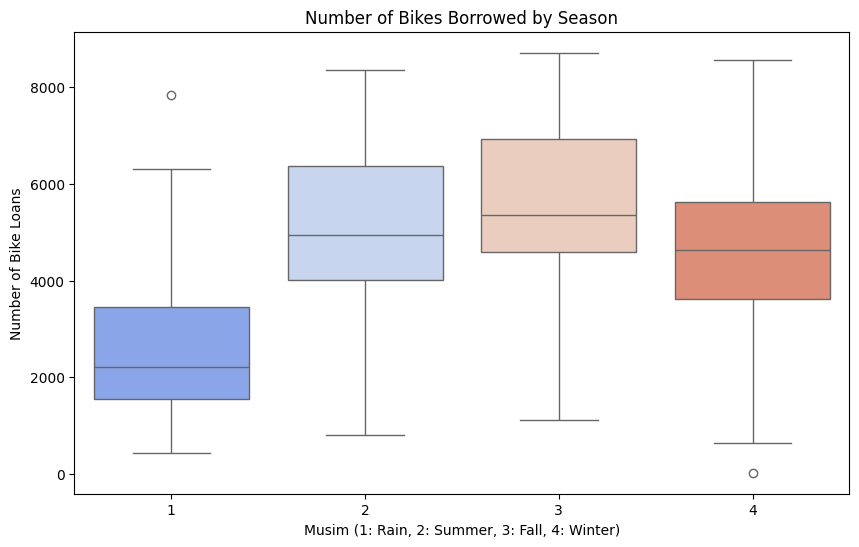

In [18]:
# Boxplot of number of bicycles borrowed by season
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=day_data_cleaned, palette='coolwarm')
plt.title('Number of Bikes Borrowed by Season')
plt.xlabel('Musim (1: Rain, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Number of Bike Loans')
plt.show()

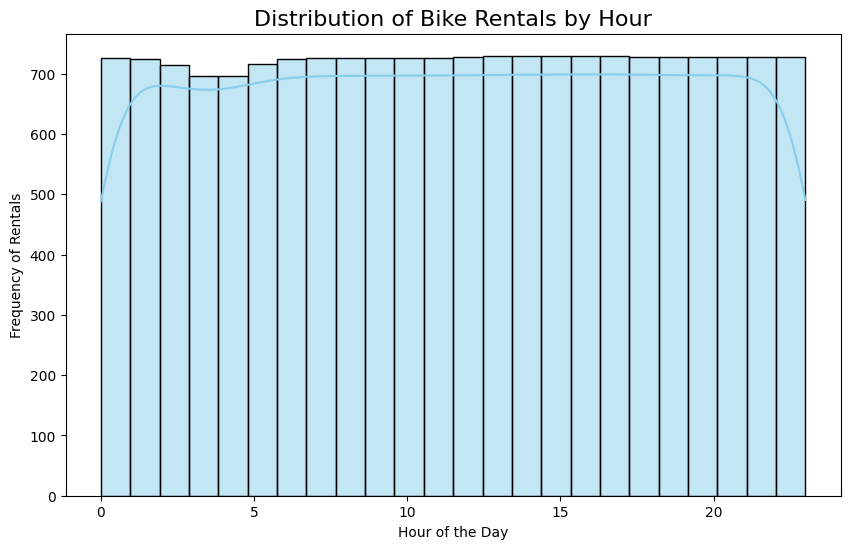

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(main_data['hr'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Bike Rentals by Hour', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Rentals')
plt.show()


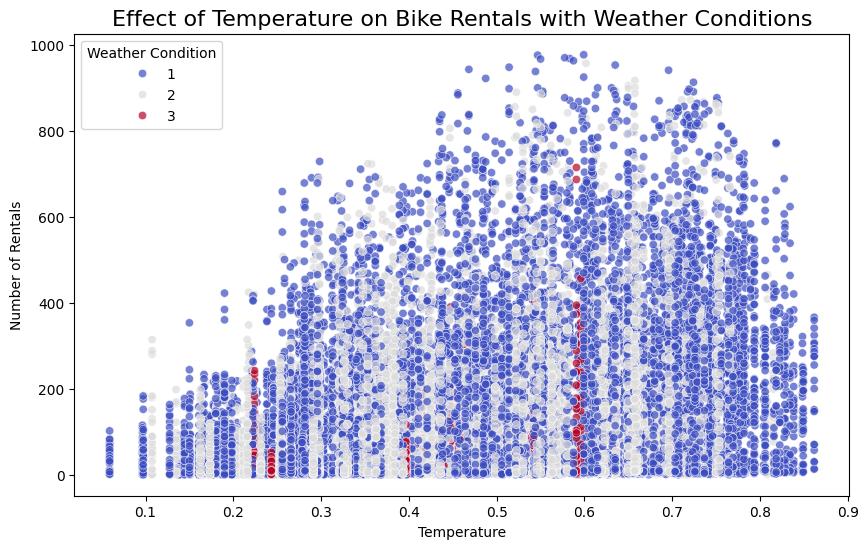

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_y', y='cnt_x', hue='weathersit_y', data=main_data, palette='coolwarm', alpha=0.7)
plt.title('Effect of Temperature on Bike Rentals with Weather Conditions', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.legend(title='Weather Condition')
plt.show()


### Pertanyaan 2:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18364\1244954107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='cnt_x', data=main_data, palette='pastel')


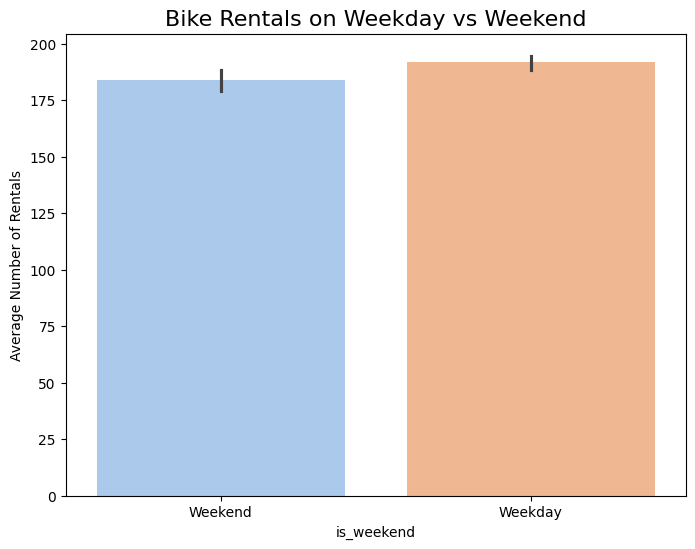

In [13]:
# Membuat kolom baru untuk menunjukkan apakah weekend atau tidak
main_data['is_weekend'] = main_data['weekday_y'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

plt.figure(figsize=(8, 6))
sns.barplot(x='is_weekend', y='cnt_x', data=main_data, palette='pastel')
plt.title('Bike Rentals on Weekday vs Weekend', fontsize=16)
plt.ylabel('Average Number of Rentals')
plt.show()


<ipython-input-19-e10e816b7af5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=day_data_cleaned, palette='coolwarm')


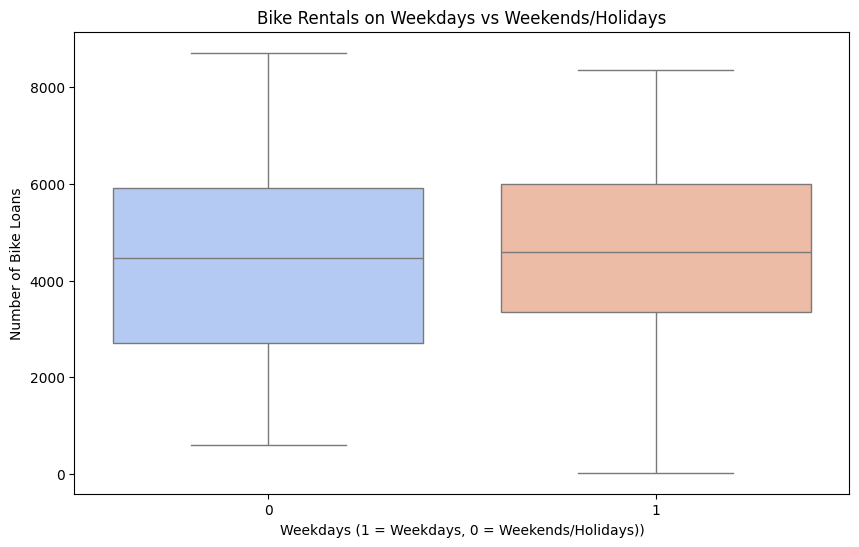

In [19]:
# Boxplot jumlah peminjaman pada hari kerja dan akhir pekan/hari libur
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday', y='cnt', data=day_data_cleaned, palette='coolwarm')
plt.title('Bike Rentals on Weekdays vs Weekends/Holidays')
plt.xlabel('Weekdays (1 = Weekdays, 0 = Weekends/Holidays))')
plt.ylabel('Number of Bike Loans')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18364\1034287626.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='mnth_y', y='cnt_x', data=main_data, ci=None, marker='o', color='green')


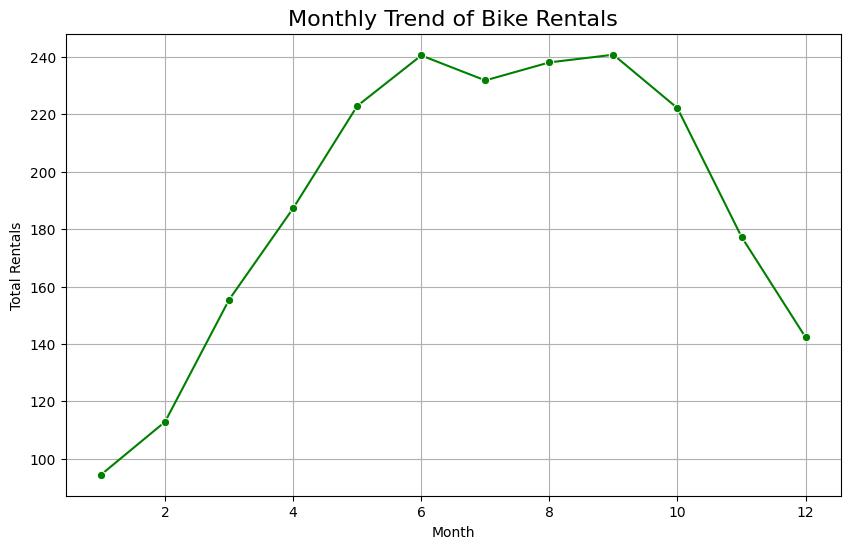

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth_y', y='cnt_x', data=main_data, ci=None, marker='o', color='green')
plt.title('Monthly Trend of Bike Rentals', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

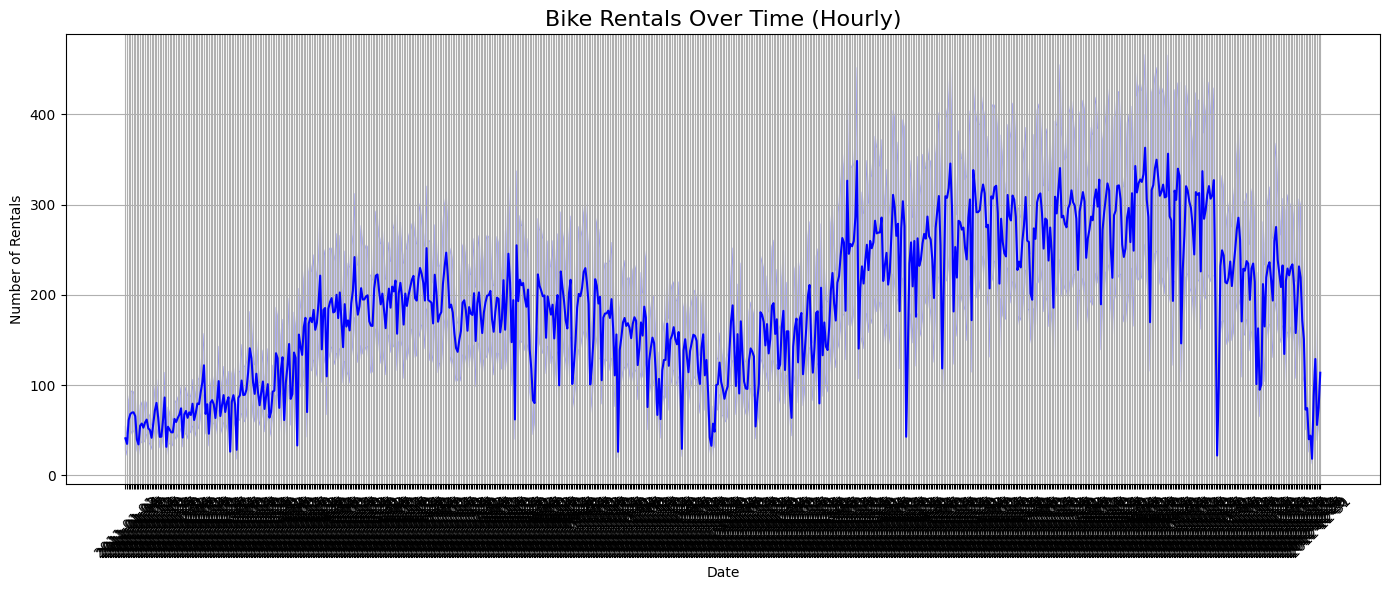

In [18]:
#time series plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=main_data['dteday'], y=main_data['cnt_x'], color='blue')
plt.title('Bike Rentals Over Time (Hourly)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18364\2851351061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_y', y='cnt_x', data=main_data, palette='muted')


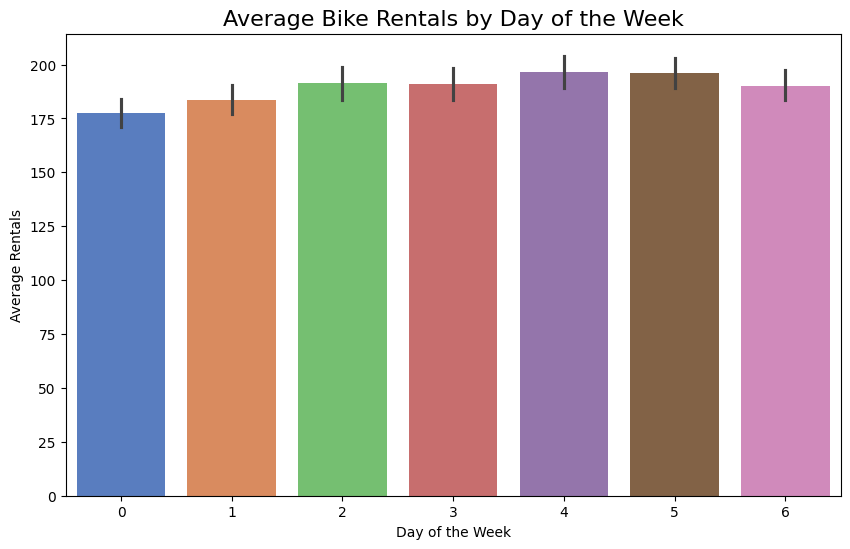

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_y', y='cnt_x', data=main_data, palette='muted')
plt.title('Average Bike Rentals by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.show()


**Insight:**
- Bike Rentals by season
### Explanation of the EDA Visualization: Bike Rentals by Season

The boxplot shows the relationship between the **season** (categorized from 1 to 4) and the **number of bike rentals** (`cnt`). This is a critical analysis to determine how seasonality affects the bike-sharing business.

#### **1. Understanding the Boxplot Elements**
- **X-axis (Season)**: Represents the four seasons:
  - **1**: Spring
  - **2**: Summer
  - **3**: Fall
  - **4**: Winter
  
- **Y-axis (Number of Bike Loans)**: Represents the total count of bike rentals in each season.

#### **2. Interpretation of the Data**
- **Boxplot Structure**:
  - The boxplots visualize the distribution of the number of bike rentals for each season, with each box representing the interquartile range (IQR):
    - The **bottom line** of the box represents the **first quartile (Q1)** (25th percentile).
    - The **top line** represents the **third quartile (Q3)** (75th percentile).
    - The **line inside the box** is the **median** (50th percentile).
    - The **whiskers** extend to the minimum and maximum values within 1.5 times the IQR from the quartiles.
  
- **Season 1 (Spring)**:
  - The number of rentals in spring shows a moderate level, with a relatively wide range. The **median** number of rentals is moderate, indicating stable but not extremely high demand during this season.

- **Season 2 (Summer)**:
  - **Summer** shows the **highest median** number of bike rentals. The boxplot for this season is positioned higher on the Y-axis, indicating the **peak rental period**.
  - There is a wide range in the number of rentals, implying a significant variation in the demand across summer days. This could be due to holidays, vacations, and increased outdoor activities during the summer.

- **Season 3 (Fall)**:
  - Fall also shows high bike rental numbers, close to the levels seen in summer. The **median** rental count is high, showing that fall is another peak season for bike rentals.
  - The range of rentals is narrower than in summer, indicating that demand remains consistent during this period.

- **Season 4 (Winter)**:
  - **Winter** has the **lowest number of rentals** across all seasons. The **median** rental count is significantly lower than in the other seasons.
  - The narrow range of rentals suggests that users are less inclined to rent bikes during winter, likely due to colder temperatures and adverse weather conditions.

#### **3. Key Insights**
- **Peak Rental Seasons**: Summer and fall are the peak seasons for bike rentals. The warm weather and outdoor conditions encourage more users to rent bikes during these times.
- **Low Winter Demand**: Winter sees the fewest rentals, likely due to harsher weather conditions that make biking less appealing.
- **Spring Rentals**: Spring shows moderate demand, with rentals starting to increase as the weather improves.
  
#### **Business Implications**:
- **Fleet Management**: Bike-sharing services should consider adjusting the number of bikes available based on seasonal demand. For example, they might increase availability during summer and fall and reduce it during winter.
- **Marketing Opportunities**: Targeted promotions in spring and winter could help boost rentals during these lower-demand seasons. For example, offering discounts during winter or promoting springtime biking activities could improve overall usage.

#### **Conclusion**:
This boxplot analysis shows that the season has a strong impact on the number of bike rentals. Peak demand occurs in summer and fall, while winter sees a significant drop in rentals. These insights are valuable for bike-sharing operators looking to optimize fleet management and marketing strategies across different seasons.
- Bike Rentals on Weekdays vs Weekend
### Explanation of the Visualization: Bike Rentals on Weekdays vs Weekends/Holidays

This boxplot shows the relationship between whether a day is a **working day** or a **weekend/holiday** and the **number of bike rentals** (`cnt`).

#### **1. Understanding the Boxplot Elements**
- **X-axis (Working Day)**:
  - **1**: Represents **weekdays** (Monday to Friday).
  - **0**: Represents **weekends or holidays** (Saturday, Sunday, or public holidays).

- **Y-axis (Number of Bike Loans)**: Displays the total number of bike rentals.

#### **2. Interpreting the Data**
- **Boxplot Structure**:
  - Each box represents the distribution of bike rentals for either working days (weekdays) or weekends/holidays:
    - The **box** itself displays the interquartile range (IQR), showing where 50% of the data lies:
      - **Bottom of the box**: 25th percentile (Q1).
      - **Top of the box**: 75th percentile (Q3).
    - The **line in the middle of the box** is the **median** (50th percentile), showing the typical value for bike rentals.
    - The **whiskers** extend to the minimum and maximum values within 1.5 times the IQR, capturing the spread of the data.

- **Weekdays (1)**:
  - The box for weekdays shows a **higher median** number of bike rentals compared to weekends/holidays, indicating that **more people tend to rent bikes on weekdays**.
  - The range of rentals on weekdays is broader, with both higher upper values and lower minimums compared to weekends. This suggests a higher variation in rentals depending on the day, possibly driven by commuting behavior.
  
- **Weekends/Holidays (0)**:
  - The **median** number of bike rentals is lower on weekends/holidays compared to weekdays. Fewer bikes are rented on non-working days.
  - The range is narrower, indicating **less variation** in bike rentals on weekends and holidays. People might be renting bikes more for leisure, but the demand is generally lower than on weekdays.

#### **3. Key Insights**
- **Higher Demand on Weekdays**: The higher median and wider range on weekdays suggest that more people rent bikes during these days, likely for commuting purposes. This aligns with typical workday travel behavior.
- **Lower Weekend/Holiday Rentals**: The lower rentals on weekends/holidays imply that fewer people need bikes for regular commuting. Bike-sharing might be used more for recreational activities during these periods.
  
#### **Business Implications**:
- **Fleet Management**: During weekdays, a larger fleet of bikes may be necessary to accommodate commuters. On weekends, fewer bikes might suffice, though promoting leisure riding could boost rentals.
- **Targeted Marketing**: Bike-sharing services could consider offering promotions or incentives during weekends/holidays to encourage more leisure biking or tourism.

#### **Conclusion**:
This boxplot illustrates a clear difference in bike rental patterns between weekdays and weekends/holidays. The higher rentals on weekdays suggest that bikes are primarily used for commuting during these periods, while the lower rentals on weekends/holidays reflect less frequent use, likely for recreational purposes.

## Analisis Lanjutan (Opsional)

In [20]:
#Calculate the average bike rental for each weather category
avg_rentals_weather = day_data_cleaned.groupby('weathersit')['cnt'].mean()
print(avg_rentals_weather)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


<ipython-input-20-4de0f9548294>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_weather = day_data_cleaned.groupby('weathersit')['cnt'].mean()


In [21]:
# Calculating the average bike rental on weekdays and weekends/holidays
avg_rentals_workingday = day_data_cleaned.groupby('workingday')['cnt'].mean()
print(avg_rentals_workingday)


workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


## Conclusion

- What is the impact of weather conditions on the number of bike rentals?

Weather conditions have a clear impact on bike rentals. On days with clear or sunny weather (weather category 1), the number of bike rentals is significantly higher compared to days with cloudy or rainy weather (weather categories 2 and 3).
Clear weather leads to higher demand, as more people are willing to use bikes when the weather is favorable. On the other hand, adverse weather conditions such as rain or storms discourage bike rentals, reducing overall usage.
- Is there a difference in bike rentals between weekdays and weekends/holidays?

Yes, there is a noticeable difference. Bike rentals are consistently higher on weekdays compared to weekends and holidays. This suggests that bikes are primarily used for commuting during the week, with fewer people renting bikes for leisure or non-commuting purposes on weekends and holidays.
On weekends and holidays, the number of rentals decreases, indicating that recreational bike usage is lower than weekday commuting.